# Tensor Networks as Factorized Proposal Distributions

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(0, os.path.dirname(os.path.abspath("")))
from experiments.tensor_dist import tn_prob_dist as tnpd
from src.tt_eda.MPS_TN import MPS
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 20,
    "legend.fontsize": 15,
    "axes.linewidth": 1.5,
})

# Sampling from Tensor Factorized Probability Distribution: Empirical & Theoretical 

## 1-Norm Definition of Probability


MPS tensors shapes:
Tensor 0: (1, 2, 4)
[[0.5 0.  0.  0. ]]
Tensor 1: (4, 2, 4)
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
Tensor 2: (4, 2, 4)
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
Tensor 3: (4, 2, 1)
[[0.5]
 [0. ]
 [0. ]
 [0. ]]


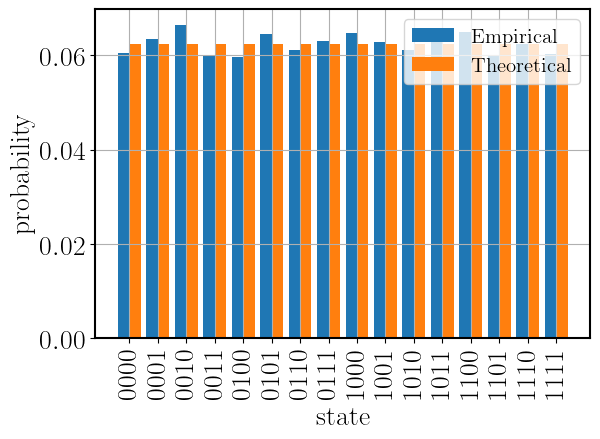

KL div.:  0.0005868269611959357  Chi-sqr p-val.:  0.28109408238660005  Helli. dist.:  0.012116025061612032


In [6]:
# Create a uniform probability distribution over 4 binary variables
L = 4
# Create the MPS (1-norm non-negative, not Born machine with 2-Norm definition of probabilities) representation of the uniform distribution
P = MPS.uniform_pdf_MPS(length=L,const_chi=4)


P_tnsrs= [node.tensor for node in P.nodes_ls]

print("MPS tensors shapes:")
for i, tnsr in enumerate(P_tnsrs):
    print(f"Tensor {i}: {tnsr.shape}")
    print(tnsr[:,0,:])

num_samples = 15000 
samples = P.seq_sample_from(num_samples=num_samples,seed=354)
P_emp = tnpd.P_empirical(samples=samples, L=L)
P_theo = np.array([1/(2**L)]*(2**L))
x = np.arange(2**L)
plt.bar(x - 0.2, P_emp, 0.4, label="Empirical")
plt.bar(x + 0.2, P_theo, 0.4, label="Theoretical")
plt.xticks(x, [format(i, f'0{L}b') for i in range(2**L)], rotation=90)
plt.xlabel("state")
plt.ylabel("probability")
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

kl_div = tnpd.KL_div(P=P_theo,Q=P_emp)
p_value = tnpd.chisqr_PQ(P=P_theo,Q=P_emp,num_samples=num_samples)
hell_dist = tnpd.hellinger_distance(P_theo,P_emp)

print('KL div.: ', kl_div,' Chi-sqr p-val.: ', p_value, ' Helli. dist.: ', hell_dist)
    


# Increasing the probability mass around certain states: Local DMRG-like gradient sweeps

Before opt [-2.77258872 -2.77258872 -2.77258872 -2.77258872 -2.77258872 -2.77258872
 -2.77258872 -2.77258872]
After opt [-2.61398369 -2.61398369 -3.12480931 -2.10315808 -2.10315808 -2.61398369
 -3.12480931 -3.12480931]


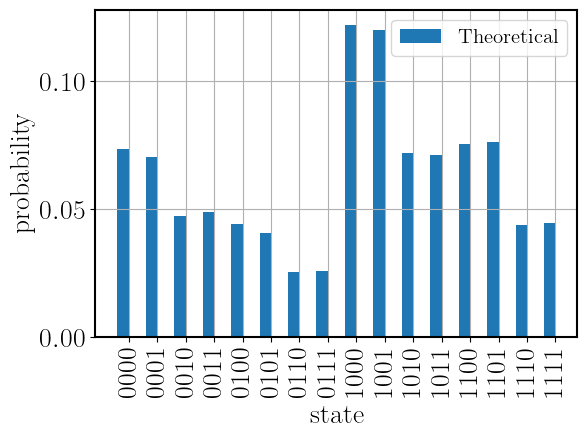

In [ ]:
L2 = 4
# Create the MPS (1-norm non-negative, not Born machine with 2-Norm definition of probabilities) representation of the uniform distribution
P2 = MPS.uniform_pdf_MPS_pad_zero(length=L2,const_chi=2)
# P2 = MPS.from_uniform(length=L2, const_chi=4)
P2_tnsrs= [node.tensor for node in P2.nodes_ls]

print("MPS tensors shapes:")
for i, tnsr in enumerate(P2_tnsrs):
    print(f"Tensor {i}: {tnsr.shape}")
    print(tnsr[:,0,:])

opt_samples = np.array([[0,0,0,0],[1,1,0,0]])



print('Before opt',P2.log_likelihood_1norm_samples(opt_samples))  
P2.one_site_batch_grad_default(opt_samples, steps_per_site=1,num_sweeps=500,learning_rate=0.05)

num_samples = 5000
samples = P2.seq_sample_from(num_samples=num_samples,seed=1234)

print('After opt',P2.log_likelihood_1norm_samples(opt_samples))
Q = tnpd.P_empirical(samples=samples, L=L)

x = np.arange(2**L2)
plt.bar(x - 0.2, Q, 0.4, label="Theoretical")
# plt.bar(x + 0.2, Q, 0.4, label="Empirical")
plt.xticks(x, [format(i, f'0{L}b') for i in range(2**L2)], rotation=90)
plt.xlabel("state")
plt.grid()
plt.ylabel("probability")
plt.axhline(1.0, color='k', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()







## Born Machines for Probabilistic Modelling


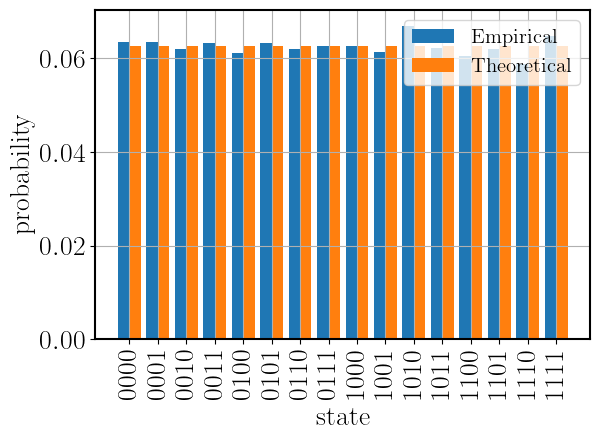

KL div.:  0.00041092399208979627  Chi-sqr p-val.:  0.6489435660782477  Helli. dist.:  0.010141515691403608


In [ ]:
# Create a uniform probability distribution over 4 binary variables
L = 4
# Create the MPS (1-norm non-negative, not Born machine with 2-Norm definition of probabilities) representation of the uniform distribution
P = MPS.uniform_Born_pdf_MPS(length=L,const_chi=4)

num_samples = 15000 
samples = P.born_sample(num_samples=num_samples,seed=34)
P_emp = tnpd.P_empirical(samples=samples, L=L)
P_theo = np.array([1/(2**L)]*(2**L))
x = np.arange(2**L)
plt.bar(x - 0.2, P_emp, 0.4, label="Empirical")
plt.bar(x + 0.2, P_theo, 0.4, label="Theoretical")
plt.xticks(x, [format(i, f'0{L}b') for i in range(2**L)], rotation=90)
plt.xlabel("state")
plt.ylabel("probability")
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

kl_div = tnpd.KL_div(P=P_theo,Q=P_emp)
p_value = tnpd.chisqr_PQ(P=P_theo,Q=P_emp,num_samples=num_samples)
hell_dist = tnpd.hellinger_distance(P_theo,P_emp)

print('KL div.: ', kl_div,' Chi-sqr p-val.: ', p_value, ' Helli. dist.: ', hell_dist)
    


Before opt [-2.77258872]
After opt [-1.28785871e-14]


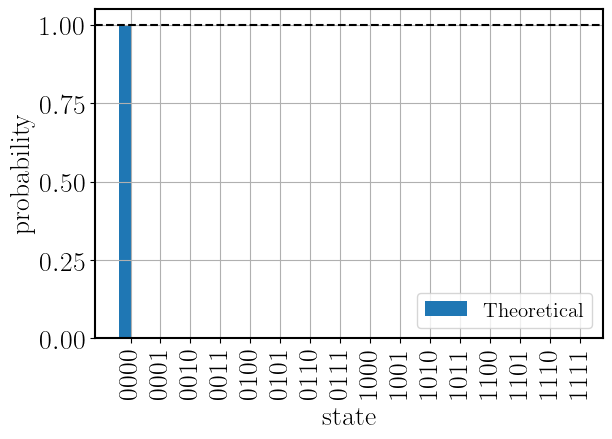

In [19]:
L2 = 4
# Create the MPS (2-norm non-negative Born machine with 2-Norm definition of probabilities) representation of the uniform distribution
P2 = MPS.uniform_Born_pdf_MPS(length=L,const_chi=4)
# print(P2.frob_norm())
# print(P2.calc_1Norm_prob_w_condits([0]*L2))
# print('aaa',np.log(P2.calc_2Norm_prob_w_condits([0]*L2)))
# print(np.sum(np.log(P2.calc_1Norm_conditional_probs([0]*L2))))
# print(P2.log_likelihood_2norm([0]*L2))
# P2 = MPS.from_uniform(length=L2, const_chi=4)

opt_samples = np.array([[0,0,0,0]])

print('Before opt',P2.log_likelihood_2norm_samples(opt_samples))  
P2.two_site_batch_grad_born(opt_samples,num_sweeps=200,learning_rate=0.01)
# P2.one_site_batch_grad_born(opt_samples,num_sweeps=200,learning_rate=0.01)


num_samples = 15000
samples = P2.born_sample(num_samples=num_samples,seed=12234)

print('After opt',P2.log_likelihood_2norm_samples(opt_samples))

Q = tnpd.P_empirical(samples=samples, L=L2)

x = np.arange(2**L2)
plt.bar(x - 0.2, Q, 0.4, label="Theoretical")
# plt.bar(x, Q, label="Theoretical")

# plt.bar(x + 0.2, Q, 0.4, label="Empirical")
plt.xticks(x, [format(i, f'0{L}b') for i in range(2**L2)], rotation=90)
plt.xlabel("state")
plt.axhline(1.0, color='k', linestyle='--')
plt.grid()
plt.ylabel("probability")
plt.legend()
plt.tight_layout()
plt.show()
